<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/build_multi_input_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x=layers.Input(shape=(100))
y=layers.Dense(1000, activation='relu')(x)
y=layers.Dense(10)(y)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
def build_multi_input_model():
  x1=layers.Input(shape=32, name='x1')
  y1=layers.Dense(32, activation='relu')(x1)
  y1=layers.Dense(16, activation='relu')(y1)

  x2=layers.Input(shape=32, name='x2')
  y2=layers.Dense(32, activation='relu')(x2)
  y2=layers.Dense(16, activation='relu')(y2)

  y=layers.concatenate([y1,y2])
  y=layers.Dense(10, activation='softmax', name='y')(y)
  return models.Model(inputs=[x1,x2], outputs=y)

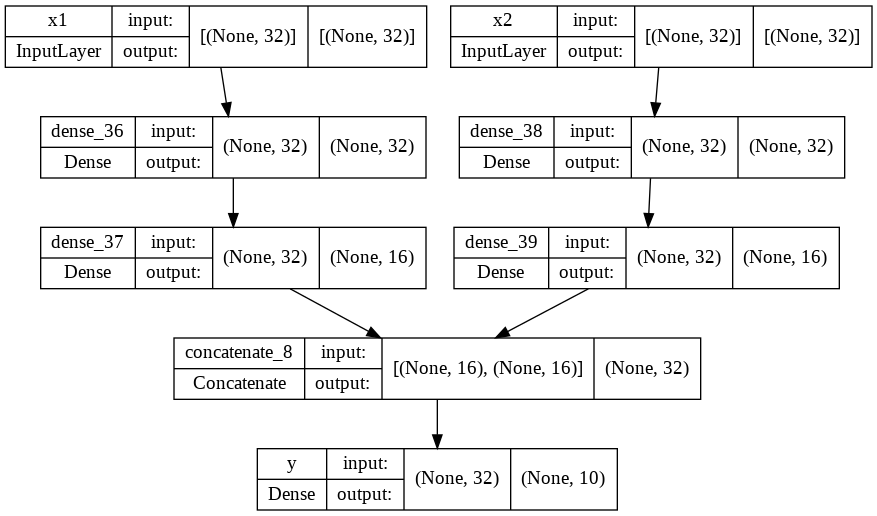

In [ ]:
model=build_multi_input_model()
utils.plot_model(model, show_shapes=True)

In [ ]:
import numpy as np
x1_train=np.random.random(size=(100,32))
x2_train=np.random.random(size=(100,32))
y_train=np.random.randint(0,9, size=(100, ))
print(y_train.shape)
for y in y_train[:5]:
  print(y)

(100,)
5
1
6
5
8


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop')

In [ ]:
model.fit([x1_train, x2_train], y_train, 
           epochs=5,
           batch_size=4)

Epoch 1/5
25/25 [==============================] - 1s 2ms/step - loss: 2.3269
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 2.2241
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 2.1784
Epoch 4/5
25/25 [==============================] - 0s 2ms/step - loss: 2.1413
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 2.1120


In [ ]:
model.fit({'x1':x1_train, 'x2': x2_train}, y_train, 
          epochs=5,
          batch_size=4)

Epoch 1/5
25/25 [==============================] - 0s 3ms/step - loss: 2.0812
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 2.0591
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 2.0328
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 2.0099
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 1.9831


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils

def build_multi_output_model():
  x=layers.Input(shape=32, name='x')
  y=layers.Dense(32, activation='relu')(x)
  y=layers.Dense(16, activation='relu')(y)

  y_city=layers.Dense(10, activation='softmax', name='y_city')(y)
  y_gender=layers.Dense(1, activation='sigmoid', name='y_gender')(y)
  y_age=layers.Dense(1, name='y_age')(y)
  return models.Model(inputs=x, outputs=[y_city, y_gender, y_age])
  

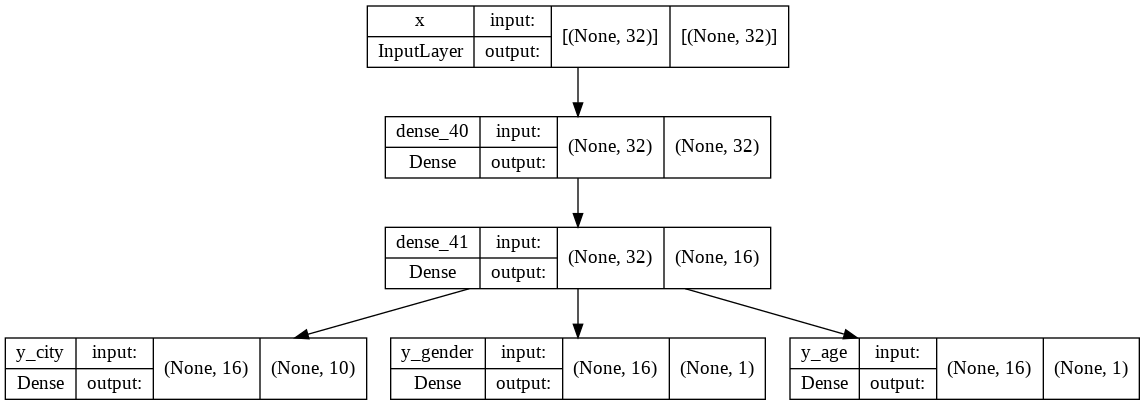

In [ ]:
model=build_multi_output_model()
utils.plot_model(model, show_shapes=True)

In [ ]:
x_train=np.random.random(size=(100,32))
y1_train=np.random.randint(0,10, size=(100,))
y2_train=np.random.randint(0,2, size=(100,))
y3_train=np.random.random(size=(100,))
for x in [x_train, y1_train, y2_train, y3_train]:
  print(x.shape, x[3])

(100, 32) [0.09070578 0.56551002 0.11679707 0.03711015 0.52661003 0.96210192
 0.68789605 0.26339849 0.06034608 0.86762112 0.59629577 0.41413045
 0.61455349 0.41562055 0.24385498 0.564675   0.39175256 0.18829189
 0.40567725 0.39207677 0.18109986 0.22522036 0.96321671 0.08323683
 0.66837322 0.72301903 0.35839197 0.55741619 0.34763006 0.19170467
 0.77334761 0.80849336]
(100,) 6
(100,) 1
(100,) 0.17856426380187618


In [ ]:
model.compile(optimizer='rmsprop',
              loss=['sparse_categorical_crossentropy',
                    'binary_crossentropy',
                    'mse'])

In [ ]:
model.fit(x_train,[y1_train, y2_train, y3_train], epochs=4, batch_size=8)

Epoch 1/4
13/13 [==============================] - 1s 3ms/step - loss: 28.1945 - y_city_loss: 3.1092 - y_gender_loss: 0.7032 - y_age_loss: 24.3820
Epoch 2/4
13/13 [==============================] - 0s 3ms/step - loss: 12.0844 - y_city_loss: 2.7008 - y_gender_loss: 0.6911 - y_age_loss: 8.6925
Epoch 3/4
13/13 [==============================] - 0s 3ms/step - loss: 5.3955 - y_city_loss: 2.6451 - y_gender_loss: 0.7101 - y_age_loss: 2.0403
Epoch 4/4
13/13 [==============================] - 0s 3ms/step - loss: 3.6905 - y_city_loss: 2.6156 - y_gender_loss: 0.7114 - y_age_loss: 0.3634


In [ ]:
model.compile(optimizer='rmsprop',
              loss=['sparse_categorical_crossentropy',
                    'binary_crossentropy',
                    'mse'],
              loss_weights=[0.1,0.3,1])

In [ ]:
model.fit(x_train,[y1_train, y2_train, y3_train], epochs=4, batch_size=8)

Epoch 1/4
13/13 [==============================] - 1s 5ms/step - loss: 0.7052 - y_city_loss: 2.5171 - y_gender_loss: 0.7029 - y_age_loss: 0.2427
Epoch 2/4
13/13 [==============================] - 0s 6ms/step - loss: 0.6365 - y_city_loss: 2.4307 - y_gender_loss: 0.6984 - y_age_loss: 0.1839
Epoch 3/4
13/13 [==============================] - 0s 6ms/step - loss: 0.6196 - y_city_loss: 2.3960 - y_gender_loss: 0.6944 - y_age_loss: 0.1717
Epoch 4/4
13/13 [==============================] - 0s 5ms/step - loss: 0.5973 - y_city_loss: 2.3641 - y_gender_loss: 0.6977 - y_age_loss: 0.1516


In [ ]:
def InceptionModule(x):
  a=layers.Conv2D(128, 1, strides=2, padding='same', activation='relu')(x)

  b=layers.Conv2D(128,1,strides=1, padding='same', activation='relu')(x)
  b=layers.Conv2D(128,3,strides=2, padding='same', activation='relu')(b)

  c=layers.AvgPool2D(pool_size=3, strides=2, padding='same')(x)
  c=layers.Conv2D(128,3,strides=1, padding='same', activation='relu')(c)

  d=layers.Conv2D(128,1, strides=1, padding='same', activation='relu')(x)
  d=layers.Conv2D(128,3, strides=1, padding='same', activation='relu')(d)
  d=layers.Conv2D(128,3, strides=2, padding='same', activation='relu')(d)

  y=layers.concatenate([a, b, c, d], axis=-1)
  return y

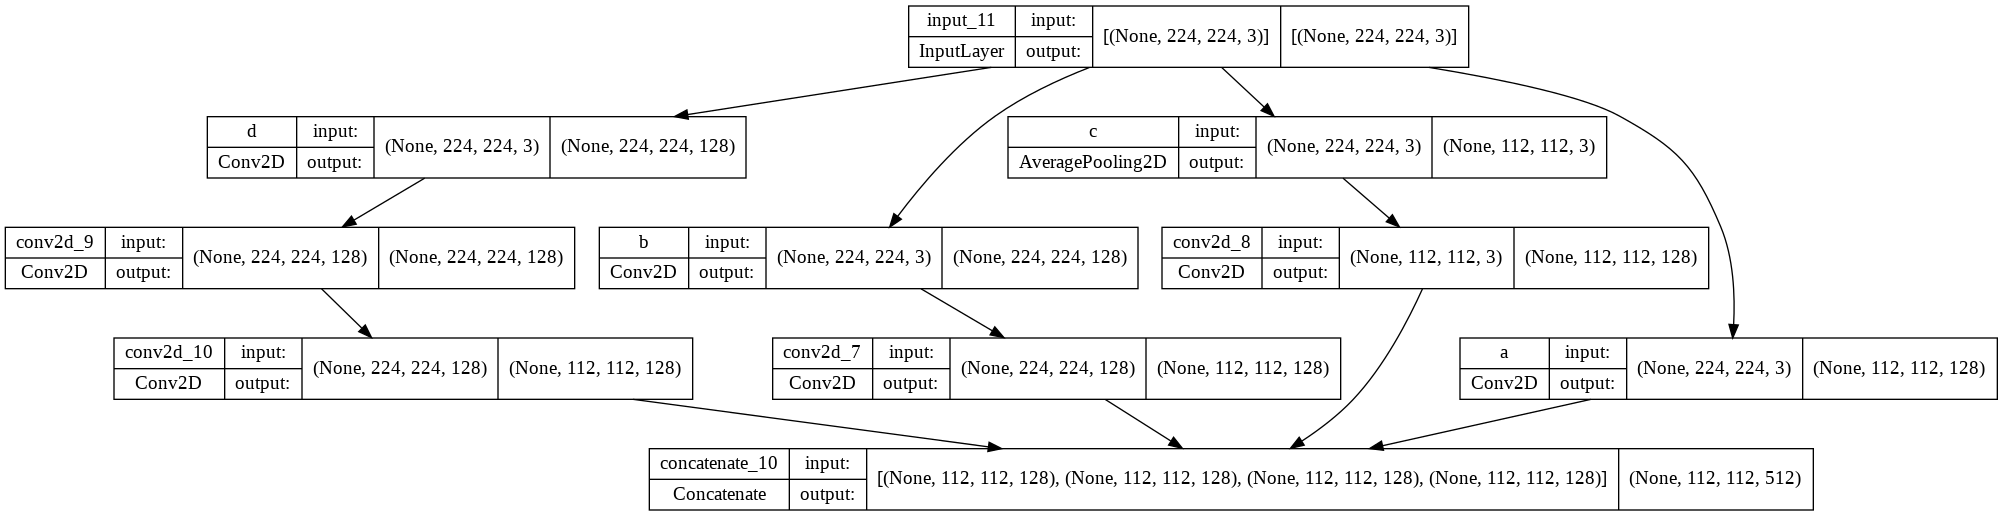

In [ ]:
def build_Inception():
  x = layers.Input(shape=(224,224,3))
  y = InceptionModule(x)
  return models.Model(x, y)
model = build_Inception()
utils.plot_model(model, show_shapes=True)

In [ ]:
def ResidualBlock(x):
  y=layers.Conv2D(128,3, activation='relu', padding='same')(x)
  y=layers.Conv2D(128,3, activation='relu', padding='same')(y)
  y=layers.Conv2D(128,3, activation='relu', padding='same')(y)
  y=layers.add([y, x])
  return y

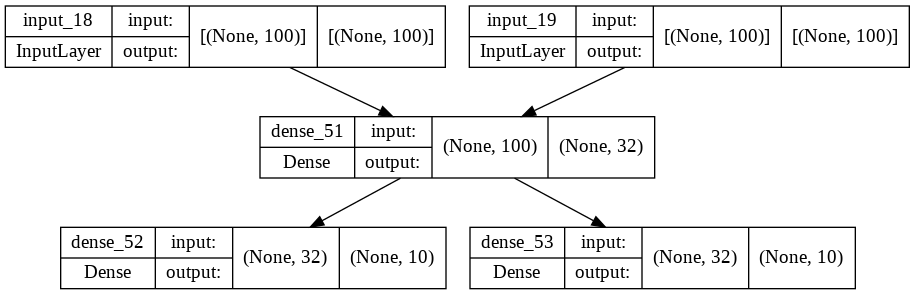

In [ ]:
def shared_model():
  dense=layers.Dense(32)

  x1=layers.Input(shape=(100))
  y1=dense(x1)
  y1=layers.Dense(10)(y1)

  x2=layers.Input(shape=(100))
  y2=dense(x2)
  y2=layers.Dense(10)(y2)

  return models.Model([x1,x2], [y1,y2])

model=shared_model()
utils.plot_model(model, show_shapes=True)

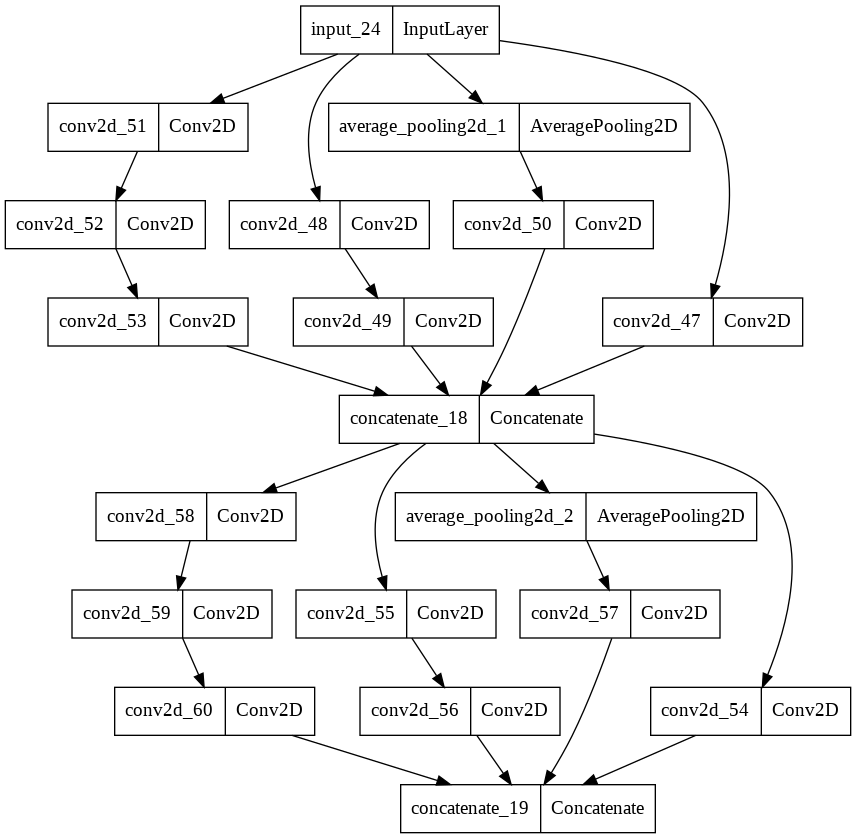

In [ ]:
def build_Inception():
  x=layers.Input(shape=(224,224,3))
  y=InceptionModule(x)
  y=InceptionModule(y)
  return models.Model(x, y)

model=build_Inception()
utils.plot_model(model)

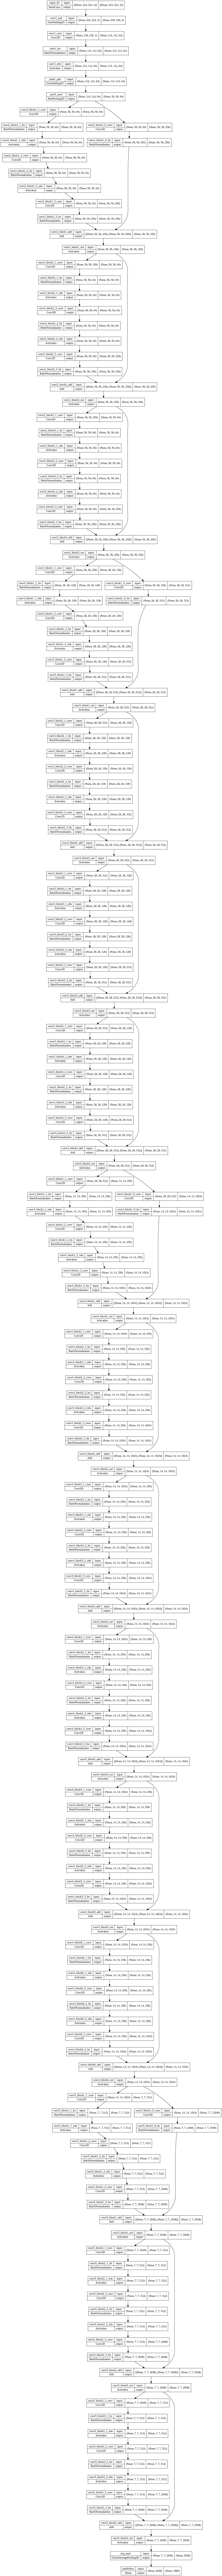

In [ ]:
base_model=tf.keras.applications.ResNet50(weights=None, 
                                          include_top=True)

utils.plot_model(base_model, show_shapes=True)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

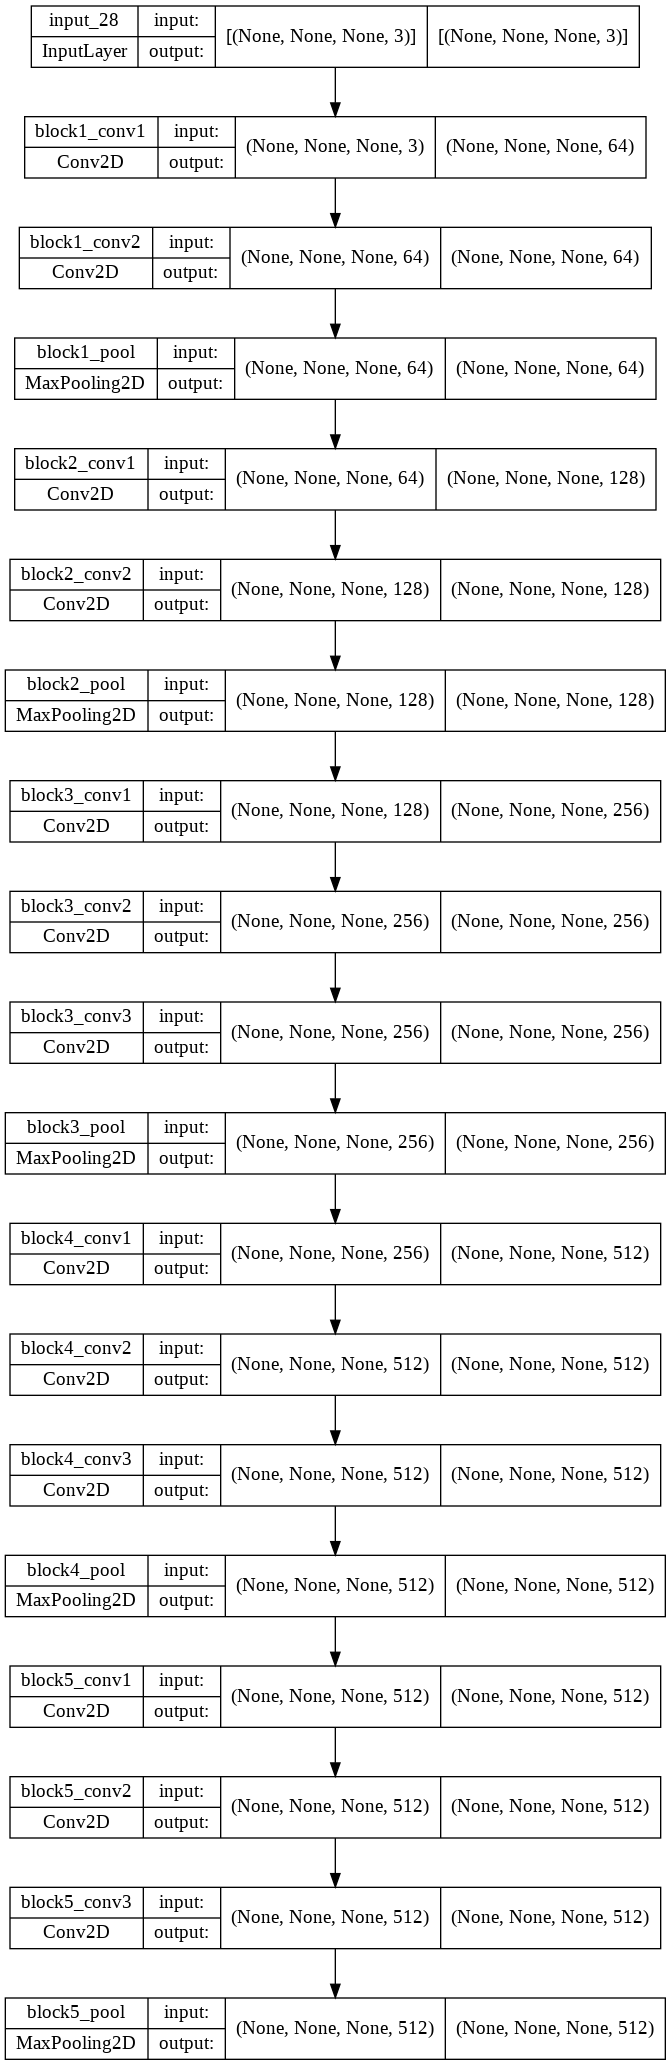

In [ ]:
base_model=tf.keras.applications.VGG16(weights=None,
                                       
                                       include_top=False)

base_model.summary()
utils.plot_model(base_model, show_shapes=True)

### 7.1.7 추가 학습 : 인물 사진 분류하기

* 데이터 https://drive.google.com/u/0/uc?id=1t2qIgpWdWX_n5OC8P2ZiDfPIQ98NY_PB&export=download

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, utils, layers

In [ ]:
! gdown https://drive.google.com/u/0/uc?id=1t2qIgpWdWX_n5OC8P2ZiDfPIQ98NY_PB&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1t2qIgpWdWX_n5OC8P2ZiDfPIQ98NY_PB
To: /content/celeba_small.npz
100% 174M/174M [00:01<00:00, 154MB/s]


In [ ]:
celeba=np.load('/content/celeba_small.npz')
list(celeba.keys())

['train_images', 'train_labels', 'test_images', 'test_labels']

In [ ]:
train_images=celeba['train_images']
train_labels=celeba['train_labels']
test_labels=celeba['test_images']
test_images=celeba['test_labels']
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((2000, 72, 59, 3), (2000, 2), (200, 2), (200, 72, 59, 3))

In [ ]:
gender_dict={0:'Female', 1:'Male'}
issmile_dict={0: 'Not Smile',1: 'Smile'}


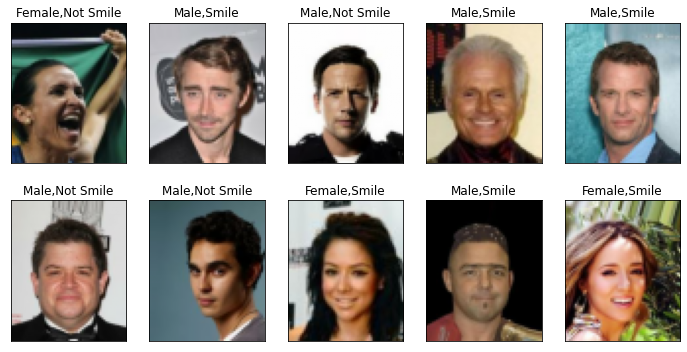

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i])
  gender, issmile=train_labels[i][0],train_labels[i][1]
  plt.title(f'{gender_dict[gender]},{issmile_dict[issmile]}')
  plt.xticks([]); plt.yticks([])

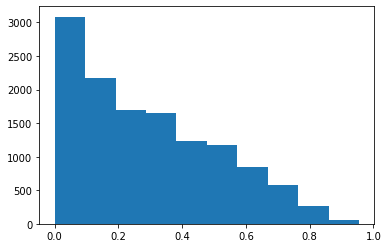

In [ ]:
_=plt.hist(train_images[0].flatten())

In [ ]:
x_train=train_images[:]
x_test=test_images[:]
x_train.shape, x_test.shape

((2000, 72, 59, 3), (200, 2))

In [ ]:
y1_train=train_labels[:, 0]
y2_train=train_labels[:, 1]
y1_test=test_labels[:, 0]
y2_test=test_labels[:,1]
y1_train.shape, y2_train.shape, y1_test.shape, y2_test.shape

((2000,), (2000,), (200, 59, 3), (200, 59, 3))

Text(0.5, 1.0, 'isSmile')

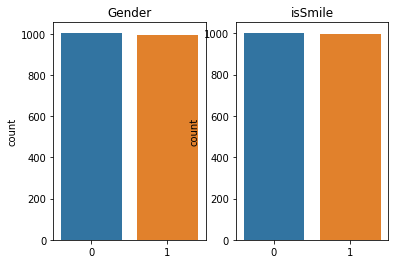

In [ ]:
import seaborn as sns
plt.subplot(121); sns.countplot(x=y1_train);plt.title('Gender')
plt.subplot(122); sns.countplot(x=y2_train);plt.title('isSmile')

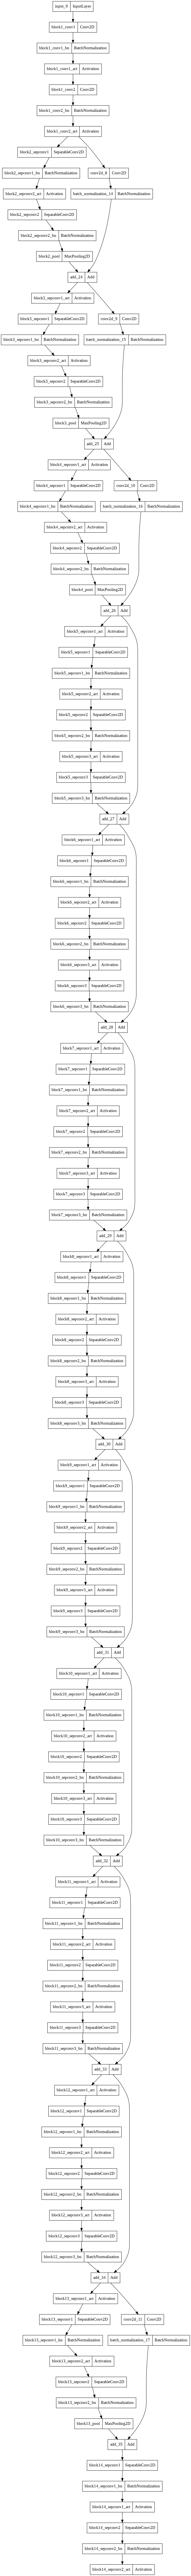

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, utils, layers
base_model=tf.keras.applications.Xception(weights=None,
                                          include_top=False)
utils.plot_model(base_model)

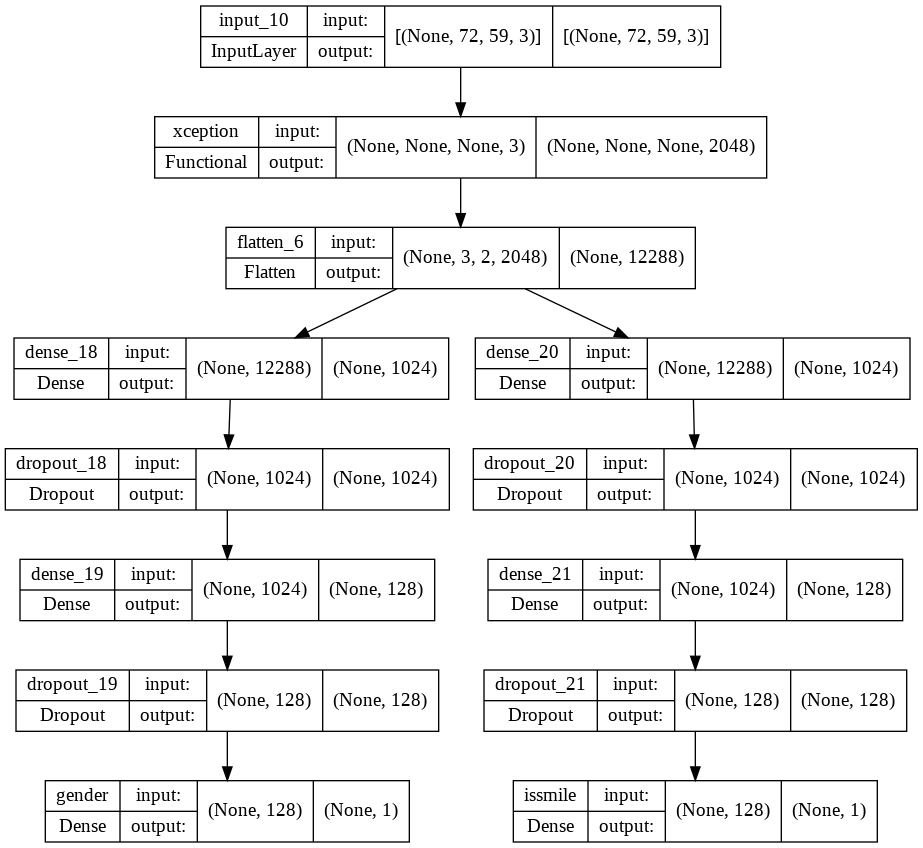

In [ ]:
def build_model():
  x=layers.Input(shape=(72,59,3))
  y=layers.BatchNormalization()(x)
  y=base_model(x)
  y=layers.Flatten()(y)

  y1=layers.Dense(1024, activation='relu')(y)
  y1=layers.Dropout(0.5)(y1)
  y1=layers.Dense(128, activation='relu')(y1)
  y1=layers.Dropout(0.5)(y1)
  y1=layers.Dense(1, activation='sigmoid', name='gender')(y1)

  y2=layers.Dense(1024, activation='relu')(y)
  y2=layers.Dropout(0.5)(y2)
  y2=layers.Dense(128, activation='relu')(y2)
  y2=layers.Dropout(0.5)(y2)
  y2=layers.Dense(1,activation='sigmoid', name='issmile')(y2)

  return models.Model(x, [y1,y2])

model=build_model()
utils.plot_model(model, show_shapes=True)



In [ ]:
model = build_model()
model.compile(loss = ['binary_crossentropy', 'binary_crossentropy'], # 두개 모두 이진분류
              optimizer = 'adam', # 학습률 - 얼마나 가중치를 업데이트 
              metrics = ['acc'])
history = model.fit(x_train, [y1_train, y2_train],
                    validation_split=0.2, # 훈련 데이터에서 일부분 검증용으로 사용
                    epochs = 30
                    )

Epoch 1/30
50/50 [==============================] - 22s 96ms/step - loss: 1.9172 - gender_loss: 0.9237 - issmile_loss: 0.9935 - gender_acc: 0.6331 - issmile_acc: 0.5300 - val_loss: 1.3864 - val_gender_loss: 0.6931 - val_issmile_loss: 0.6933 - val_gender_acc: 0.5300 - val_issmile_acc: 0.4750
Epoch 2/30
50/50 [==============================] - 4s 71ms/step - loss: 1.1478 - gender_loss: 0.4263 - issmile_loss: 0.7215 - gender_acc: 0.8094 - issmile_acc: 0.5088 - val_loss: 1.3866 - val_gender_loss: 0.6933 - val_issmile_loss: 0.6933 - val_gender_acc: 0.4700 - val_issmile_acc: 0.4750
Epoch 3/30
50/50 [==============================] - 4s 71ms/step - loss: 0.9857 - gender_loss: 0.2779 - issmile_loss: 0.7078 - gender_acc: 0.8919 - issmile_acc: 0.5225 - val_loss: 1.3867 - val_gender_loss: 0.6933 - val_issmile_loss: 0.6934 - val_gender_acc: 0.4700 - val_issmile_acc: 0.4750
Epoch 4/30
50/50 [==============================] - 4s 83ms/step - loss: 0.9300 - gender_loss: 0.2528 - issmile_loss: 0.6772 -

In [ ]:
model.evaluate(x_test, [y1_test, y2_test])

ValueError: ignored